In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [15]:
n_pts = 100
centers = [[-0.4, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_pts, random_state=123, centers=centers, cluster_std=0.4)
# print(X)
# print(y)


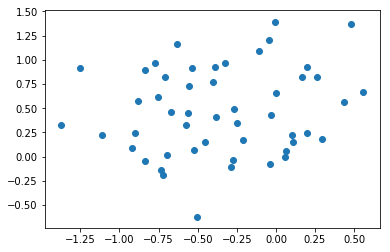

In [16]:
plt.scatter(X[y==0, 0], X[y==0, 1])


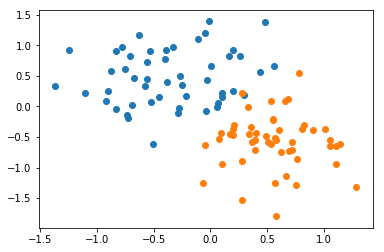

In [17]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [18]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred


In [19]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [20]:
[w,b] = model.parameters()
print(w, b)
w1, w2 = w.view(2)
b1 = b[0]
print(w1.item(), w2.item(), b1.item())

def get_params():
    return (w1.item(), w2.item(), b1.item())
    

Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True) Parameter containing:
tensor([0.1939], requires_grad=True)
0.16220331192016602 -0.1682732105255127 0.19390898942947388


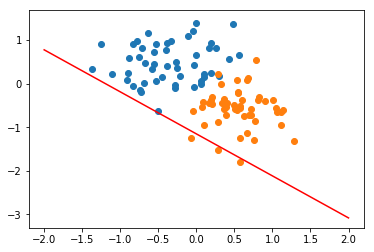

In [21]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b1) / w2
    plt.plot(x1, x2, 'r')
    scatter_plot()
    
plot_fit('Initial model')

In [22]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(100,1)

In [23]:
# Training

epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('epoch:', i, 'loss', loss.item())

    losses.append(loss)
    optimizer.zero_grad() # initialize gradient to 0
    loss.backward()
    optimizer.step()
    

epoch: 0 loss 0.6226662397384644
epoch: 1 loss 0.6217162013053894
epoch: 2 loss 0.6207691431045532
epoch: 3 loss 0.619825005531311
epoch: 4 loss 0.6188837289810181
epoch: 5 loss 0.6179456114768982
epoch: 6 loss 0.6170098185539246
epoch: 7 loss 0.6160772442817688
epoch: 8 loss 0.6151475310325623
epoch: 9 loss 0.6142207980155945
epoch: 10 loss 0.6132964491844177
epoch: 11 loss 0.6123751997947693
epoch: 12 loss 0.6114566922187805
epoch: 13 loss 0.610541045665741
epoch: 14 loss 0.6096282005310059
epoch: 15 loss 0.6087179780006409
epoch: 16 loss 0.6078106760978699
epoch: 17 loss 0.606905996799469
epoch: 18 loss 0.6060042381286621
epoch: 19 loss 0.6051051616668701
epoch: 20 loss 0.6042088270187378
epoch: 21 loss 0.6033151745796204
epoch: 22 loss 0.6024242639541626
epoch: 23 loss 0.6015360355377197
epoch: 24 loss 0.6006505489349365
epoch: 25 loss 0.5997676849365234
epoch: 26 loss 0.5988876223564148
epoch: 27 loss 0.598010241985321
epoch: 28 loss 0.5971353054046631
epoch: 29 loss 0.59626299142

epoch: 295 loss 0.4341459274291992
epoch: 296 loss 0.4337272346019745
epoch: 297 loss 0.4333098530769348
epoch: 298 loss 0.432893306016922
epoch: 299 loss 0.43247780203819275
epoch: 300 loss 0.4320632517337799
epoch: 301 loss 0.4316498637199402
epoch: 302 loss 0.43123722076416016
epoch: 303 loss 0.4308258891105652
epoch: 304 loss 0.4304153323173523
epoch: 305 loss 0.43000587821006775
epoch: 306 loss 0.42959731817245483
epoch: 307 loss 0.42918986082077026
epoch: 308 loss 0.4287831783294678
epoch: 309 loss 0.42837774753570557
epoch: 310 loss 0.42797303199768066
epoch: 311 loss 0.4275693893432617
epoch: 312 loss 0.42716678977012634
epoch: 313 loss 0.42676517367362976
epoch: 314 loss 0.4263642132282257
epoch: 315 loss 0.42596450448036194
epoch: 316 loss 0.4255656898021698
epoch: 317 loss 0.42516767978668213
epoch: 318 loss 0.4247708022594452
epoch: 319 loss 0.42437487840652466
epoch: 320 loss 0.423979789018631
epoch: 321 loss 0.42358577251434326
epoch: 322 loss 0.42319244146347046
epoch: 3

epoch: 604 loss 0.3404303789138794
epoch: 605 loss 0.34021174907684326
epoch: 606 loss 0.3399934768676758
epoch: 607 loss 0.33977559208869934
epoch: 608 loss 0.33955803513526917
epoch: 609 loss 0.3393409252166748
epoch: 610 loss 0.3391241729259491
epoch: 611 loss 0.33890777826309204
epoch: 612 loss 0.3386918604373932
epoch: 613 loss 0.338476300239563
epoch: 614 loss 0.3382611572742462
epoch: 615 loss 0.33804622292518616
epoch: 616 loss 0.33783185482025146
epoch: 617 loss 0.33761778473854065
epoch: 618 loss 0.3374042510986328
epoch: 619 loss 0.3371908664703369
epoch: 620 loss 0.3369779884815216
epoch: 621 loss 0.3367655575275421
epoch: 622 loss 0.3365533947944641
epoch: 623 loss 0.33634161949157715
epoch: 624 loss 0.3361302316188812
epoch: 625 loss 0.33591920137405396
epoch: 626 loss 0.3357085883617401
epoch: 627 loss 0.33549830317497253
epoch: 628 loss 0.3352884352207184
epoch: 629 loss 0.3350788354873657
epoch: 630 loss 0.3348698019981384
epoch: 631 loss 0.33466097712516785
epoch: 632

epoch: 940 loss 0.28396230936050415
epoch: 941 loss 0.2838331460952759
epoch: 942 loss 0.2837041914463043
epoch: 943 loss 0.2835753560066223
epoch: 944 loss 0.2834467887878418
epoch: 945 loss 0.2833184003829956
epoch: 946 loss 0.2831900119781494
epoch: 947 loss 0.28306204080581665
epoch: 948 loss 0.2829340994358063
epoch: 949 loss 0.2828063368797302
epoch: 950 loss 0.2826787531375885
epoch: 951 loss 0.2825514078140259
epoch: 952 loss 0.28242409229278564
epoch: 953 loss 0.2822969853878021
epoch: 954 loss 0.2821701765060425
epoch: 955 loss 0.28204354643821716
epoch: 956 loss 0.2819169759750366
epoch: 957 loss 0.281790554523468
epoch: 958 loss 0.2816643714904785
epoch: 959 loss 0.28153830766677856
epoch: 960 loss 0.2814124524593353
epoch: 961 loss 0.28128668665885925
epoch: 962 loss 0.2811613082885742
epoch: 963 loss 0.2810359299182892
epoch: 964 loss 0.28091078996658325
epoch: 965 loss 0.2807857096195221
epoch: 966 loss 0.28066086769104004
epoch: 967 loss 0.28053605556488037
epoch: 968 l

Text(0, 0.5, 'Loss')

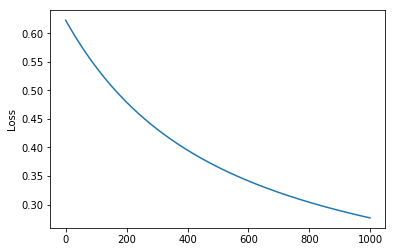

In [24]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

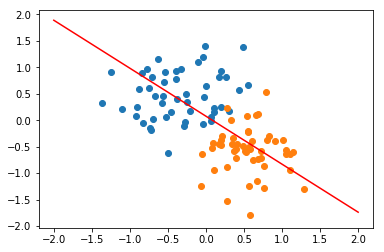

In [25]:
plot_fit('Trained Model')